# Create a Basic Mapping of Broad IDs to MOAs and Targets

Here, I add the `pert_id` column to an additional file.
This file contains only the essential mapping columns between cell painting data and drug annotations.

The primary addition is truncating the `broad_id` column into the `pert_id` column (e.g. `BRD-K89787693-001-01-1` becomes `BRD-K89787693`) and describing the impact.

I create a new file (called `repurposing_info_basic.tsv`) that only contains the unique columns `pert_id`, `pert_iname`, `moa`, and `target`.

The `broad_id` column contains additional supplier, batch and aliquot information.
The `pert_id` column is the essential information that is used to directly map compounds to profiles.

In [1]:
import os
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
use_cols = ["pert_id", "pert_iname", "moa", "target"]

## Load Data and Create the `pert_id` column

In [4]:
annotation_df = pd.read_csv("repurposing_info.tsv", sep='\t')

annotation_df = annotation_df.assign(
    pert_id=annotation_df.broad_id.str.slice(0, 13)
)

print(annotation_df.shape)
annotation_df.head()

(13553, 18)


,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,pert_id
0,BRD-K76022557-003-28-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,98.90,MedChemEx,HY-12723A,Apomorphine (hydrochloride hemihydrate),267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,BRD-K76022557
1,BRD-K76022557-003-02-7,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,97.34,Tocris,2073,(R)-(-)-Apomorphine hydrochloride,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,BRD-K76022557
2,BRD-K76022557-003-29-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,97.36,Tocris,2073,(R)-(-)-Apomorphine hydrochloride,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,BRD-K76022557
3,BRD-K76022557-001-03-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,95.80,Selleck,S4350,R-(-)-Apomorphine HCl Hemihydrate,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,BRD-K76022557
4,BRD-K75516118-001-04-1,(R)-(-)-rolipram,Phase 1,phosphodiesterase inhibitor,PDE4A|PDE4B|PDE4C|PDE4D|PDE5A,NaN,NaN,0,93.92,Tocris,1349,(R)-(-)-Rolipram,275.152,COc1ccc(cc1OC1CCCC1)[C@@H]1CNC(=O)C1,HJORMJIFDVBMOB-LBPRGKRZSA-N,448055.0,NaN,BRD-K75516118


## Describe the Effect of adding `pert_id`

How many columns are replicated?

In [5]:
# There are no duplicate `broad_ids`
annotation_df.broad_id.duplicated().sum()

0

In [6]:
pert_counts = annotation_df.pert_id.value_counts()
pert_counts.head(10)

BRD-K68432770    8
BRD-A34299591    8
BRD-K41260949    8
BRD-K35458079    7
BRD-K06519765    7
BRD-K71879491    7
BRD-K08547377    7
BRD-K52756523    7
BRD-K88043978    6
BRD-K12251893    6
Name: pert_id, dtype: int64

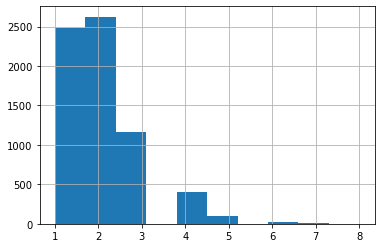

In [7]:
pert_counts.hist();

In [8]:
# How many pert ids are duplicated?
num_duplicate = (pert_counts > 1).sum()
percent_duplicate = (num_duplicate / pert_counts.shape[0]) * 100

print("There are {} ({}%) duplicated `pert_ids`".format(num_duplicate, percent_duplicate))

There are 4326 (63.56156332647663%) duplicated `pert_ids`


In [9]:
# Examples of duplicate pert_id columns
top_duplicated_pert_id = pert_counts.head(1).index.values[0]
annotation_df.query("pert_id == @top_duplicated_pert_id")

,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,pert_id
691,BRD-K68432770-236-24-9,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,84.41,MedChemEx,HY-B0522A,Ampicillin (sodium),349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
692,BRD-K68432770-236-20-7,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,11.12,MicroSource,1500123,AMPICILLIN SODIUM,349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
693,BRD-K68432770-236-23-1,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,76.31,MedChemEx,HY-B0522A,Ampicillin (sodium),349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
694,BRD-K68432770-236-22-3,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,73.48,Sigma,MFCD00064313,"sodium (2S,5R,6R)-6-{[(2R)-2-amino-2-phenyleth...",349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
695,BRD-K68432770-236-21-5,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,19.53,Selleck,S3170,Ampicillin sodium,349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
696,BRD-K68432770-236-19-9,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,61.66,Selleck,S3170,Ampicillin sodium,349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770
697,BRD-K68432770-341-07-2,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,34.05,Selleck,S4148,Ampicillin Trihydrate,349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,BRD-K94927753-341-01-3,BRD-K68432770
698,BRD-K68432770-341-05-6,ampicillin,Launched,bacterial cell wall synthesis inhibitor,NaN,infectious disease,respiratory tract infections|meningitis|bacter...,0,31.52,Selleck,S4148,Ampicillin Trihydrate,349.11,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,AVKUERGKIZMTKX-NJBDSQKTSA-N,7048611.0,NaN,BRD-K68432770


## Select only essential columns and determine/reconcile any discrepancies

In [10]:
basic_df = annotation_df.loc[:, use_cols].drop_duplicates()

print(basic_df.shape)
basic_df.head()

(6806, 4)


,pert_id,pert_iname,moa,target
0,BRD-K76022557,(R)-(-)-apomorphine,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...
4,BRD-K75516118,(R)-(-)-rolipram,phosphodiesterase inhibitor,PDE4A|PDE4B|PDE4C|PDE4D|PDE5A
7,BRD-K62353271,(R)-baclofen,benzodiazepine receptor agonist,GABBR1|GABBR2
9,BRD-K65856711,(S)-(+)-rolipram,phosphodiesterase inhibitor,PDE4B|PDE4D
12,BRD-K89787693,"[sar9,met(o2)11]-substance-p",tachykinin antagonist,TACR1


In [11]:
duplicated_pert_ids = basic_df.pert_id.loc[basic_df.pert_id.duplicated()]
assert len(duplicated_pert_ids) == 0, "Warning! There are duplicated pert_ids"

In [12]:
output_file = "repurposing_simple.tsv"
basic_df.to_csv(output_file, index=False, sep="\t")